# Laboratorio 2


In [295]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

import pandas as pd  # importar pandas

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [296]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Regresión lineal con multiples variables
En esta celda se **carga el dataset** desde un archivo CSV llamado *melb\_data.csv*, luego se selecciona 10 columnas numéricas como **variables independientes (X)** que describen características de las propiedades (distancia, habitaciones, baños, etc.) y define a **Price** como la **variable dependiente (y)** que se desea predecir. Después calcula `m`, que corresponde al **número total de registros** en el dataset. Finalmente, imprime un encabezado y muestra las primeras 10 filas con los valores de la primera columna de `X` (Distance), la segunda columna de `X` (Bedroom2) y la variable objetivo `y` (Price), con el fin de **visualizar una parte de los datos cargados** y comprobar que se hayan leído correctamente.




In [297]:
# Cargar datos
df = pd.read_csv('/content/gdrive/MyDrive/Lab2-Monsie/melb_data.csv')

X = df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount']].values
y = df['Price'].values
m = y.size
print(m)

print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

13580
  X[:,0] X[:, 1]         y
--------------------------
       2       2   1480000
       2       2   1035000
       2       3   1465000
       2       3    850000
       2       3   1600000
       2       2    941000
       2       4   1876000
       2       2   1636000
       2       1    300000
       2       3   1097000


La función `featureNormalize` recibe una matriz de datos y devuelve una versión normalizada, donde a cada columna se le resta su media y se divide entre su desviación estándar; además, retorna los valores de la media y la desviación de cada columna para poder reutilizarlos.


In [298]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

llama featureNormalize con los datos cargados

In [299]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 2.5000000e+00  2.0000000e+00  1.0000000e+00 ... -3.7799600e+01
   1.4499840e+02  4.0190000e+03]
 [ 2.5000000e+00  2.0000000e+00  1.0000000e+00 ... -3.7807900e+01
   1.4499340e+02  4.0190000e+03]
 [ 2.5000000e+00  3.0000000e+00  2.0000000e+00 ... -3.7809300e+01
   1.4499440e+02  4.0190000e+03]
 ...
 [ 6.8000000e+00  3.0000000e+00  2.0000000e+00 ... -3.7852740e+01
   1.4488738e+02  6.3800000e+03]
 [ 6.8000000e+00  4.0000000e+00  1.0000000e+00 ... -3.7859080e+01
   1.4489299e+02  6.3800000e+03]
 [ 6.3000000e+00  4.0000000e+00  1.0000000e+00 ... -3.7811880e+01
   1.4488449e+02  6.5430000e+03]]
Media calculada: [ 1.01377761e+01  2.91472754e+00  1.53424153e+00             nan
  5.58416127e+02             nan             nan -3.78092027e+01
  1.44995216e+02  7.45441738e+03]
Desviación estandar calculada: [5.86850886e+00 9.65885497e-01 6.91686254e-01            nan
 3.99052231e+03            nan            nan 7.92569043e-02
 1.03911735e-01 4.37842055e+03]
[[-1.30148498e+00 -9.47035175e-01 

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [300]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [301]:
print(X)

[[ 1.00000000e+00 -1.30148498e+00 -9.47035175e-01 ...  1.21159582e-01
   3.06395829e-02 -7.84624806e-01]
 [ 1.00000000e+00 -1.30148498e+00 -9.47035175e-01 ...  1.64368448e-02
  -1.74781777e-02 -7.84624806e-01]
 [ 1.00000000e+00 -1.30148498e+00  8.82842322e-02 ... -1.22723149e-03
  -7.85462560e-03 -7.84624806e-01]
 ...
 [ 1.00000000e+00 -5.68760518e-01  8.82842322e-02 ... -5.49318283e-01
  -1.03776717e+00 -2.45389260e-01]
 [ 1.00000000e+00 -5.68760518e-01  1.12360364e+00 ... -6.29311314e-01
  -9.83779046e-01 -2.45389260e-01]
 [ 1.00000000e+00 -6.53961037e-01  1.12360364e+00 ... -3.37796006e-02
  -1.06557924e+00 -2.08161223e-01]]


### Descenso por el gradiente



Esta función `computeCostMulti` calcula el costo. Recibe como parámetros la matriz de características `X`, el vector de valores reales `y` y los parámetros del modelo `theta`. Primero obtiene el número de ejemplos de entrenamiento `m`, luego calcula la diferencia entre las predicciones del modelo (`np.dot(X, theta)`) y los valores reales `y`, eleva esas diferencias al cuadrado, las suma y finalmente divide entre `2m`. El resultado `J` representa el error promedio cuadrático del modelo, que sirve para evaluar qué tan bien se ajustan los parámetros `theta` a los datos.


In [302]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


gradientDescentMulti implementa el descenso por gradiente para múltiples variables.
Recibe los datos de entrada, las etiquetas, los parámetros iniciales, la tasa de aprendizaje y el número de iteraciones.
En cada iteración actualiza theta minimizando el costo y guarda la evolución en J_history.
Finalmente retorna los parámetros ajustados y el historial de costos.

In [303]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

En esta celda se define la tasa de aprendizaje (alpha) y el número de iteraciones para entrenar el modelo de regresión lineal mediante descenso de gradiente; se inicializan los parámetros (theta) y se realiza una verificación de los datos para detectar valores nulos o infinitos, los cuales son reemplazados, además de eliminar precios extremos para trabajar solo con valores razonables. Luego se escalan los precios (y) para facilitar el cálculo y se entrena el modelo obteniendo el historial del costo y los valores finales de theta, que se grafican para observar la convergencia. Finalmente, se construye un vector con las características de una casa de ejemplo, se normalizan sus valores con la media y desviación estándar calculadas, y se usa el modelo entrenado para predecir el precio aproximado de dicha vivienda.

In [304]:
print("Verificando datos...")
print("¿Hay NaN en X?:", np.isnan(X).any())
print("¿Hay NaN en y?:", np.isnan(y).any())
print("¿Hay infinitos en X?:", np.isinf(X).any())
print("¿Hay infinitos en y?:", np.isinf(y).any())

X_clean = np.nan_to_num(X)
y_clean = np.nan_to_num(y)

mask = (y_clean > 0) & (y_clean < 10000000)
X_clean = X_clean[mask]
y_clean = y_clean[mask]

print(f"Datos después de limpiar: {len(y_clean)} ejemplos")

# Escalar solo y
y_scaled = y_clean / 1000000

Verificando datos...
¿Hay NaN en X?: True
¿Hay NaN en y?: False
¿Hay infinitos en X?: False
¿Hay infinitos en y?: False
Datos después de limpiar: 13580 ejemplos


theta calculado por el descenso por el gradiente: [ 1.07568408 -0.24763079  0.28574656  0.14108513  0.          0.01770413
  0.          0.         -0.12760628  0.09833543 -0.01029401]
El precio predecido: $1095262


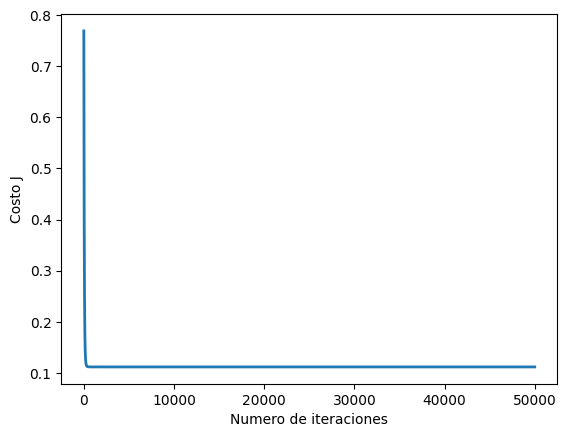

In [305]:
alpha = 0.01
num_iters = 50000

theta = np.zeros(X.shape[1])

theta, J_history = gradientDescentMulti(X_clean, y_scaled, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = np.ones(X.shape[1])
X_array[1] = 10    # Distance
X_array[2] = 3     # Bedroom2
X_array[3] = 2     # Bathroom
X_array[4] = 2     # Car
X_array[5] = 500   # Landsize
X_array[6] = 120   # BuildingArea
X_array[7] = 2000  # YearBuilt
X_array[8] = -37.8 # Lattitude
X_array[9] = 144.9 # Longtitude
X_array[10] = 8000 # Propertycount

# Normalizar
X_array[1:] = (X_array[1:] - mu) / sigma
X_array = np.nan_to_num(X_array)

price = np.dot(X_array, theta) * 1000000

print('El precio predecido: ${:.0f}'.format(price))

Esta celda crea un vector de características `X_array` inicializado con unos, para luego asignar valores específicos que representan las propiedades de una vivienda. Posteriormente, **él** normaliza estas características (excepto el término de intercepción) restando la media (`mu`) y dividiendo por la desviación estándar (`sigma`), asegurándose de reemplazar cualquier `NaN` resultante por cero. **Este proceso** estandariza los datos para que estén en una escala comparable.

In [306]:
X_array = np.ones(X.shape[1])
# Ajustar según las características de Melbourne:
X_array[1] = 5.0      # Distance (km del CBD)
X_array[2] = 3        # Bedroom2 (3 dormitorios)
X_array[3] = 2        # Bathroom (2 baños)
X_array[4] = 1        # Car (1 espacio de auto)
X_array[5] = 600      # Landsize (600 m2)
X_array[6] = 150      # BuildingArea (150 m2)
X_array[7] = 1995     # YearBuilt (año 1995)
X_array[8] = -37.8    # Lattitude (Melbourne)
X_array[9] = 144.9    # Longtitude (Melbourne)
X_array[10] = 7000    # Propertycount

X_array[1:] = np.nan_to_num((X_array[1:] - mu) / sigma)

Esta celda calcula el precio predicho realizando el producto punto entre el vector de características normalizadas (`X_array`) y los parámetros del modelo (`theta`), y luego deshace la escalación multiplicando por 1,000,000. **Finalmente, imprime** el resultado formateado como un precio en dólares.

In [307]:
price = np.dot(X_array, theta) * 1000000  # Desescalar el precio

print('El precio predecido para una casa a 5km del CBD, con 3 dormitorios, 2 baños y 150m2 (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa a 5km del CBD, con 3 dormitorios, 2 baños y 150m2 (usando el descenso por el gradiente): $1309039



### Ecuacion de la Normal


In [308]:

df = pd.read_csv('/content/gdrive/MyDrive/Lab2-Monsie/melb_data.csv')

X = df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount']].values
y = df['Price'].values
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

13580


Esta celda calcula los parámetros óptimos (`theta`) para un modelo de regresión lineal utilizando la ecuación normal. **Este método** realiza una operación matricial que encuentra directamente la solución que minimiza el costo, evitando el proceso iterativo del descenso de gradiente. **La función** computa `(X^T * X)^-1 * X^T * y`, lo que proporciona una solución analítica exacta en un solo paso.

In [309]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

En esta celda se prepara los datos originales añadiendo una columna de unos para el término de intercepción y luego procede a limpiar el conjunto, eliminando cualquier fila que contenga valores NaN tanto en las características (`X_original`) como en la variable objetivo (`y`). **Posteriormente, utiliza** la función `normalEqn` para calcular los parámetros óptimos del modelo (`theta`) de manera analítica a partir de estos datos limpios. **Finalmente, imprime** el vector de parámetros theta resultante, que representa la solución óptima encontrada por el método de la ecuación normal.

In [310]:
X_original = np.concatenate([np.ones((X.shape[0], 1)), df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']].values], axis=1)

print("Limpiando datos...")
mask = ~(np.isnan(X_original).any(axis=1) | np.isnan(y))
X_clean = X_original[mask]
y_clean = y[mask]

print(f"Datos después de limpiar: {len(y_clean)} ejemplos")

theta = normalEqn(X_clean, y_clean);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

Limpiando datos...
Datos después de limpiar: 6830 ejemplos
Theta calculado a partir de la ecuación de la normal: [-1.65494421e+08 -3.45230507e+04  1.64073436e+05  2.17634680e+05
  6.28712508e+04  2.38404154e+01  1.91105898e+03 -4.67887639e+03
 -1.34424916e+06  8.55806378e+05 -1.68732057e+00]


Se crea un vector de entrada de ejemplo (`X_array`) con unas y valores específicos para una propiedad. **Luego calcula** su precio predicho usando los parámetros óptimos (`theta`) obtenidos mediante la ecuación normal. **Finalmente, imprime** el resultado formateado como el valor de la vivienda.

In [311]:
X_array = np.ones(X_clean.shape[1])
X_array[1] = 5.0      # Distance (5 km del CBD)
X_array[2] = 3        # Bedroom2 (3 dormitorios)
X_array[3] = 2        # Bathroom (2 baños)
X_array[4] = 1        # Car (1 espacio de auto)
X_array[5] = 600      # Landsize (600 m2)
X_array[6] = 150      # BuildingArea (150 m2)
X_array[7] = 1995     # YearBuilt (año 1995)
X_array[8] = -37.8    # Lattitude (Melbourne)
X_array[9] = 144.9    # Longtitude (Melbourne)
X_array[10] = 7000    # Propertycount


price = np.dot(X_array, theta)

print('Precio predecido para una casa a 5km del CBD, con 3 dormitorios, 2 baños y 150m2 (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una casa a 5km del CBD, con 3 dormitorios, 2 baños y 150m2 (usando la ecuación de la normal): $1097081


## Ejercicio de programación Regresión Polinomial



In [312]:
df = pd.read_csv('/content/gdrive/MyDrive/Lab2-Monsie/melb_data.csv')

X = df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount']].values
y = df['Price'].values
m = y.size

for i in range(20):
    print('{:6.0f}{:8.0f}'.format(X[i, 0], y[i]))

     2 1480000
     2 1035000
     2 1465000
     2  850000
     2 1600000
     2  941000
     2 1876000
     2 1636000
     2  300000
     2 1097000
     2  700000
     2 1350000
     2  750000
     2 1172500
     2  441000
     2 1310000
     2 1200000
     2 1176500
     2  955000
     2  890000


Se define una función para visualizar datos. **Esta función** crea una nueva figura y grafica los puntos con cruces rojas, estableciendo el precio de las casas en el eje Y y la distancia al centro urbano en el eje X.

In [313]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Precio de casas ($)')
    pyplot.xlabel('Distancia del CBD (km)')

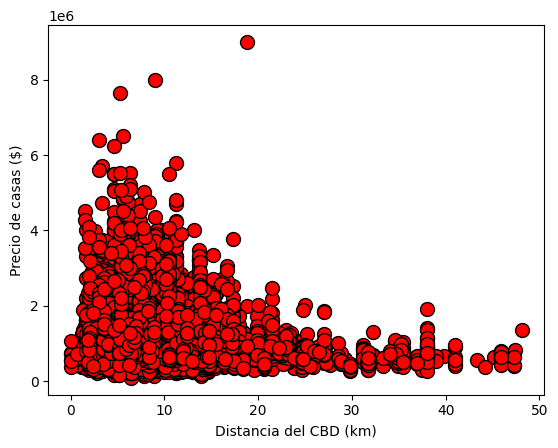

In [314]:
plotData(X[:,0], y)  # Plotear Distance vs Price

En esta celda expande el conjunto de características `X` al concatenarle una copia de sí mismo elevada al cuadrado (`X * X`). **Esta operación** agrega términos polinomiales de segundo grado (características cuadráticas) a cada característica original, permitiendo que un modelo lineal ajuste relaciones no lineales en los datos.

In [315]:
X = np.concatenate([X, X * X], axis=1)

In [316]:
print(X)

[[2.50000000e+00 2.00000000e+00 1.00000000e+00 ... 1.42880976e+03
  2.10245360e+04 1.61523610e+07]
 [2.50000000e+00 2.00000000e+00 1.00000000e+00 ... 1.42943730e+03
  2.10230860e+04 1.61523610e+07]
 [2.50000000e+00 3.00000000e+00 2.00000000e+00 ... 1.42954317e+03
  2.10233760e+04 1.61523610e+07]
 ...
 [6.80000000e+00 3.00000000e+00 2.00000000e+00 ... 1.43282993e+03
  2.09923529e+04 4.07044000e+07]
 [6.80000000e+00 4.00000000e+00 1.00000000e+00 ... 1.43330994e+03
  2.09939786e+04 4.07044000e+07]
 [6.30000000e+00 4.00000000e+00 1.00000000e+00 ... 1.42973827e+03
  2.09915154e+04 4.28108490e+07]]


Se define la función `featureNormalize` para estandarizar las características. **Calcula** la media (`mu`) y la desviación estándar (`sigma`) de cada columna de `X`. **Luego normaliza** los datos restando la media y dividiendo por la desviación estándar. **Finalmente retorna** los datos normalizados, junto con los parámetros de escalamiento.

In [317]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [318]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [319]:
print(X_norm)

[[-1.30148498e+00 -9.47035175e-01 -7.72375522e-01 ... -1.22137469e-01
   3.02838732e-02 -6.50183101e-01]
 [-1.30148498e+00 -9.47035175e-01 -7.72375522e-01 ... -1.74768304e-02
  -1.78377406e-02 -6.50183101e-01]
 [-1.30148498e+00  8.82842322e-02  6.73366668e-01 ...  1.79036094e-04
  -8.21355059e-03 -6.50183101e-01]
 ...
 [-5.68760518e-01  8.82842322e-02  6.73366668e-01 ...  5.48340210e-01
  -1.03781780e+00 -3.77708916e-01]
 [-5.68760518e-01  1.12360364e+00 -7.72375522e-01 ...  6.28396112e-01
  -9.83864718e-01 -3.77708916e-01]
 [-6.53961037e-01  1.12360364e+00 -7.72375522e-01 ...  3.27179883e-02
  -1.06561100e+00 -3.54331917e-01]]


Se grafica los datos normalizados. **Usa** la segunda columna de `X_norm` (distancia al CBD) en el eje X y el vector de precios `y` en el eje Y para visualizar la relación entre ambas variables después de la normalización.

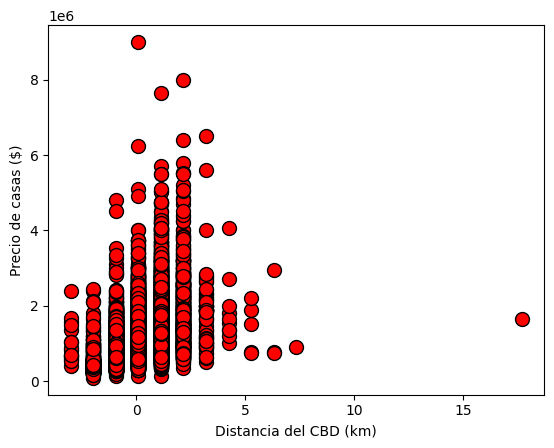

In [320]:
plotData(X_norm[:,1], y)

In [321]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

[[ 1.00000000e+00 -1.30148498e+00 -9.47035175e-01 ... -1.22137469e-01
   3.02838732e-02 -6.50183101e-01]
 [ 1.00000000e+00 -1.30148498e+00 -9.47035175e-01 ... -1.74768304e-02
  -1.78377406e-02 -6.50183101e-01]
 [ 1.00000000e+00 -1.30148498e+00  8.82842322e-02 ...  1.79036094e-04
  -8.21355059e-03 -6.50183101e-01]
 ...
 [ 1.00000000e+00 -5.68760518e-01  8.82842322e-02 ...  5.48340210e-01
  -1.03781780e+00 -3.77708916e-01]
 [ 1.00000000e+00 -5.68760518e-01  1.12360364e+00 ...  6.28396112e-01
  -9.83864718e-01 -3.77708916e-01]
 [ 1.00000000e+00 -6.53961037e-01  1.12360364e+00 ...  3.27179883e-02
  -1.06561100e+00 -3.54331917e-01]]


## Descenso por el gradiente Polinomial

Se limpia los datos, eliminando filas con valores NaN. **Luego expande** las características añadiendo términos cuadráticos para crear un modelo polinomial. **Normaliza** este nuevo conjunto y finalmente añade una columna de unos para el término de intercepción, preparando los datos para el entrenamiento.

In [322]:
print("Limpiando datos originales...")

X_original = df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
                'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
                'Propertycount']].values

mask = ~(np.isnan(X_original).any(axis=1) | np.isnan(y))
X_clean = X_original[mask]
y_clean = y[mask]

print(f"Datos limpios: {len(y_clean)} ejemplos")

X_poly = np.concatenate([X_clean, X_clean * X_clean], axis=1)
X_norm, mu, sigma = featureNormalize(X_poly)
X_final = np.concatenate([np.ones((len(y_clean), 1)), X_norm], axis=1)

Limpiando datos originales...
Datos limpios: 6830 ejemplos


Se entrena un modelo polinomial con descenso de gradiente. **Configura** una tasa de aprendizaje de 0.01 para 50,000 iteraciones, escalando los precios a millones. **Ejecuta** el algoritmo y grafica la convergencia del costo.

**Luego crea** un vector de características para una propiedad específica, añadiendo términos cuadráticos y normalizando. **Predice** el precio mediante los datos dados en "x_array" con los parámetros entrenados, deshaciendo el escalamiento al multiplicar por 1,000,000. **Finalmente imprime** el precio.

theta calculado por el descenso por el gradiente: [ 1.07760378 -0.29998764  0.38970028  0.03472591  0.07765653  0.06429535
  0.30199867  0.19374621 -0.04929285  0.04786197  0.07360624  0.08588678
 -0.27453325  0.10651953 -0.02453496 -0.0530804  -0.14089711 -0.35826696
  0.05170252  0.04461736 -0.08421542]
Precio predecido para casa a 5km del CBD, 3 dormitorios, 150m2 (descenso por gradiente): $1176639


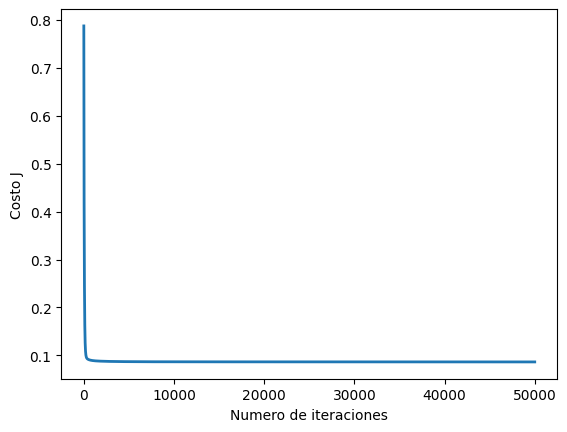

In [323]:
alpha = 0.01
num_iters = 50000

y_scaled = y_clean / 1000000

theta = np.zeros(X_final.shape[1])
theta, J_history = gradientDescentMulti(X_final, y_scaled, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = np.ones(X_final.shape[1])
X_array[1] = 5.0      # Distance
X_array[2] = 3        # Bedroom2
X_array[3] = 2        # Bathroom
X_array[4] = 1        # Car
X_array[5] = 600      # Landsize
X_array[6] = 150      # BuildingArea
X_array[7] = 1995     # YearBuilt
X_array[8] = -37.8    # Lattitude
X_array[9] = 144.9    # Longtitude
X_array[10] = 7000    # Propertycount
# Características polinómicas (cuadráticas)
X_array[11:21] = X_array[1:11] ** 2

X_array[1:] = (X_array[1:] - mu) / sigma

price = np.dot(X_array, theta) * 1000000

print('Precio predecido para casa a 5km del CBD, 3 dormitorios, 150m2 (descenso por gradiente): ${:.0f}'.format(price))

Se crea un modelo lineal simple usando solo la distancia al CBD. **Calcula** los parámetros óptimos (`theta_simple`) con la ecuación normal. **Grafica** los datos originales y superpone la línea de regresión resultante para visualizar la relación lineal entre distancia y precio.

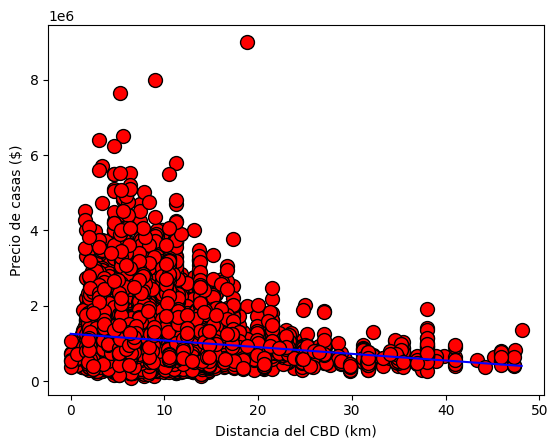

In [324]:
X_simple = np.column_stack([np.ones(m), X_original[:, 0]])
theta_simple = normalEqn(X_simple, y)

plotData(X_original[:, 0], y)
x_line = np.linspace(X_original[:, 0].min(), X_original[:, 0].max(), 100)
y_line = theta_simple[0] + theta_simple[1] * x_line
pyplot.plot(x_line, y_line, '-', color='blue')

## Ecuacion de la Normal con Polinomial

In [325]:
df = pd.read_csv('/content/gdrive/MyDrive/Lab2-Monsie/melb_data.csv')

df = df.dropna()

X = df[['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
        'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount']].values
y = df['Price'].values
m = y.size

X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [326]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta


theta = normalEqn(X, y)
print('Theta calculado:', theta)

Theta calculado: [-5.05733343e+10 -4.66008828e+04  3.97420160e+05  4.82474140e+04
  8.06819241e+04  6.76152648e+01  3.57230843e+03  1.50739509e+04
 -3.09507211e+08  6.15558914e+08  1.76009452e+01  6.70198668e+02
 -4.58340344e+04  3.67554273e+04 -3.98221710e+03 -2.56883758e-03
 -1.17313607e+00 -5.01093183e+00 -4.07473859e+06 -2.11987281e+06
 -9.21165257e-04]


Se crea manualmente un vector de características para una nueva propiedad, combinando valores originales y sus cuadrados. **Realiza** la predicción del precio mediante los parámetros dados en features para el modelo polinomial entrenado (`theta`). Finalmente imprime el resultado.

In [327]:
features = [5, 3, 2, 2, 500, 150, 2000, -37.8, 145.0, 8000]
features_squared = [x**2 for x in features]
X_array = [1] + features + features_squared

price = np.dot(X_array, theta)
print('Precio estimado: ${:.0f}'.format(price))

Precio estimado: $1286706


Se grafica la relación entre distancia y precio usando puntos rojos. **Genera** una línea de predicción manteniendo todas las demás características en sus valores promedio mientras varía solo la distancia. **Calcula** los precios predichos usando el modelo polinomial entrenado (`theta`) y superpone la curva azul resultante sobre los datos originales.

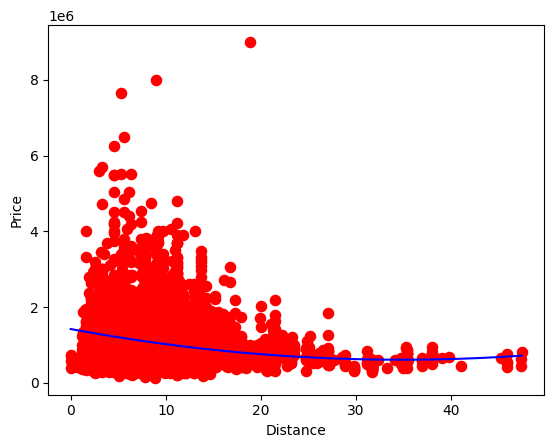

In [328]:
def plotData(x, y):
    pyplot.scatter(x, y, marker='o', c='r', s=40, linewidths=2)
    pyplot.xlabel('Distance')
    pyplot.ylabel('Price')

plotData(X[:, 1], y)

x_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
X_avg = np.mean(X, axis=0)

X_line = np.array([X_avg] * 50)
X_line[:, 1] = x_line
X_line[:, 11] = x_line**2

y_line = np.dot(X_line, theta)
pyplot.plot(x_line, y_line, '-', color='blue')
pyplot.show()